<a href="https://colab.research.google.com/github/bnegash/CS4662/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose

# import some utilities to transform our data
from keras.utils import np_utils

from tensorflow.keras import layers

In [2]:
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# add random noise to all training and testing samples and save them as new datasets
def noise(arr):
    noise_factor = 0.4
    noise_arr = arr + noise_factor * np.random.normal(
        loc=0.0, scale=1.0,size=arr.shape)
    return np.clip(noise_arr,0.0,1.0)

# Create noisy versions of the training and testing data
noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

# print the size of the training set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


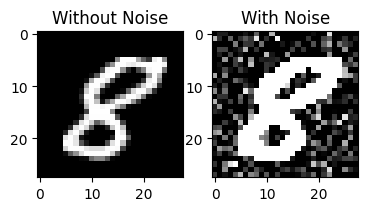

In [4]:
%matplotlib inline

# Select a random sample index
idx = np.random.randint(0, len(X_test))

# Plot the original sample
plt.subplot(1,3,1)
plt.imshow(X_test[idx], cmap='gray')
plt.title("Without Noise")

# Add noise to the sample and plot
noisy_sample = noise(X_test[idx])
plt.subplot(1,3,2)
plt.imshow(noisy_sample, cmap='gray')
plt.title("With Noise")

plt.show()

In [5]:
# Model architecture
model = Sequential()
# Encoder
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
# Decoder
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                        

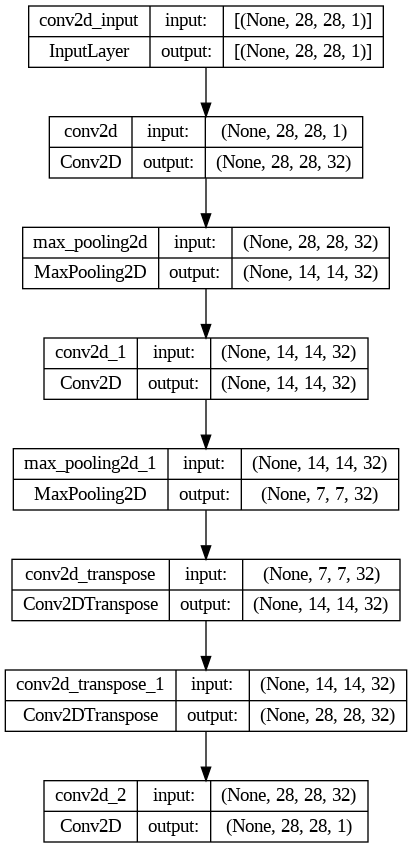

In [6]:
keras.utils.plot_model(model, show_shapes=True)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9104
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9107
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9247
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9322
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


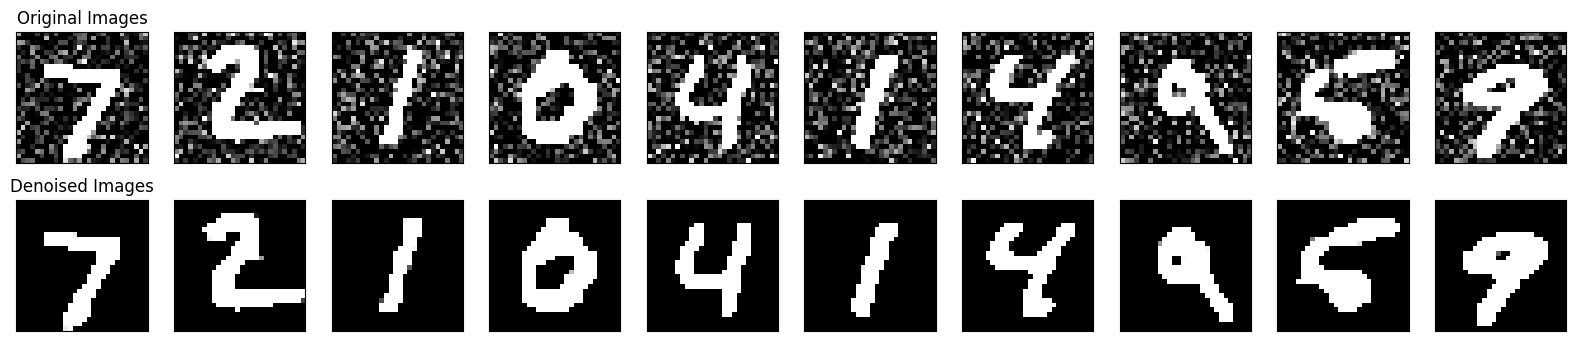

In [15]:
model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)


# Make predictions on the noisy testing set to de-noise it
denoised_X_test = model.predict(noisy_X_test)
plt.figure(figsize=(20, 4))

# Plot 10 random images of the testing set before and after de-noising
n = 10
for i in range(n):
    
    # Plot original image
    ax = plt.subplot(2, n, i + 1)
    imgplot = plt.imshow(noisy_X_test[i,:,:].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original Images")
    
    # Plot denoised image
    ax = plt.subplot(2, n, i + 1 + n)
    imgplot = plt.imshow(denoised_X_test[i,:,:].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Denoised Images")

plt.show()

# New Section

### 4-2


In [16]:
import tensorflow as tf
from tensorflow import keras


# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

from tensorflow.keras import layers
np.random.seed(0)

In [17]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


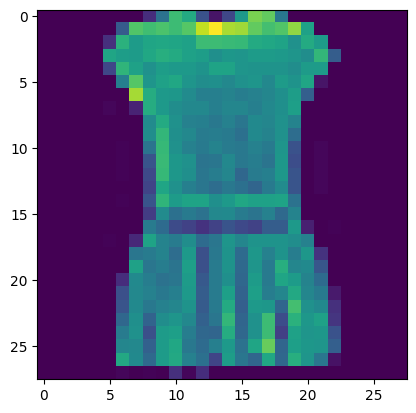

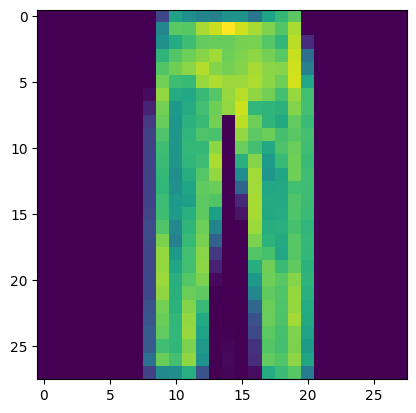

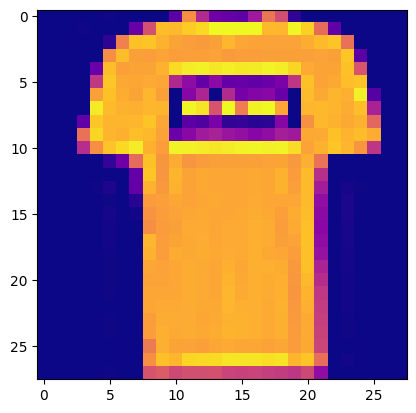

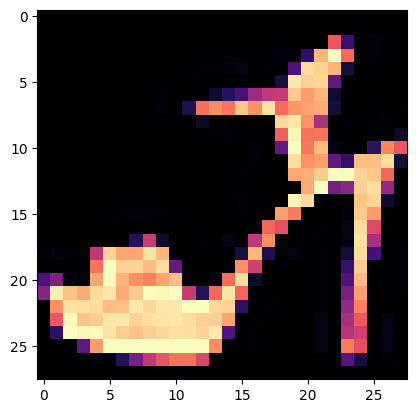

In [18]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [21]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (Model)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

# Declare Sequential model for our network:
model = Sequential()

# CNN first layer (with 64 3x3 filter):
model.add(Convolution2D(64, (3, 3), activation='sigmoid', input_shape=(28,28,1), padding="same"))
model.add(BatchNormalization())

# second CNN layer (with 64 3x3 filter):
model.add(Convolution2D(64, (3, 3), activation='sigmoid', padding="same"))
model.add(BatchNormalization())

# third CNN layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='sigmoid', padding="same"))
model.add(BatchNormalization())




In [37]:

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# fourth CNN layer (with 16 3x3 filter):
model.add(Convolution2D(16, (3, 3), activation='sigmoid', padding="same"))
model.add(BatchNormalization())

In [38]:
# output Fully connected Dense layers:
model.add(Flatten())

model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

## Compile the model:

In [39]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)      

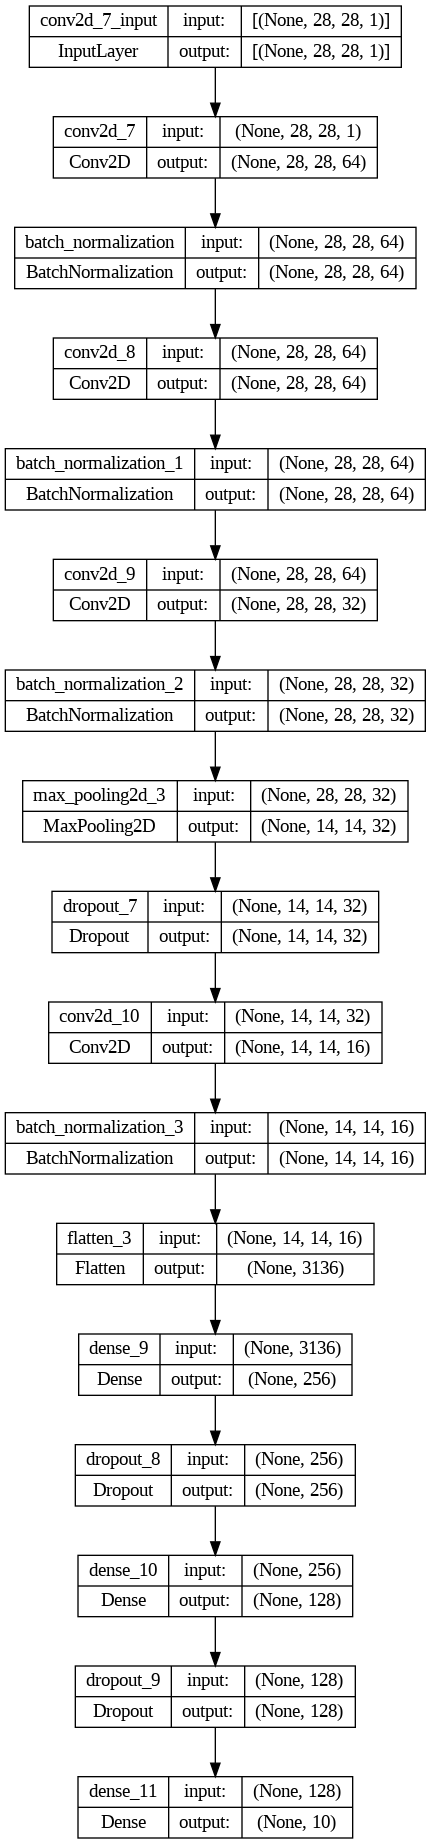

In [40]:
keras.utils.plot_model(model, show_shapes=True)

## Training

Epoch 1/20
469/469 [==============================] - 28s 51ms/step - loss: 0.9205 - accuracy: 0.6683 - val_loss: 1.7255 - val_accuracy: 0.4306
Epoch 2/20
469/469 [==============================] - 23s 49ms/step - loss: 0.6075 - accuracy: 0.7774 - val_loss: 0.4998 - val_accuracy: 0.8115
Epoch 3/20
469/469 [==============================] - 23s 49ms/step - loss: 0.5320 - accuracy: 0.8094 - val_loss: 0.4452 - val_accuracy: 0.8384
Epoch 4/20
469/469 [==============================] - 23s 49ms/step - loss: 0.4926 - accuracy: 0.8241 - val_loss: 0.3366 - val_accuracy: 0.8769
Epoch 5/20
250/469 [==============>...............] - ETA: 10s - loss: 0.4682 - accuracy: 0.8337

KeyboardInterrupt: ignored

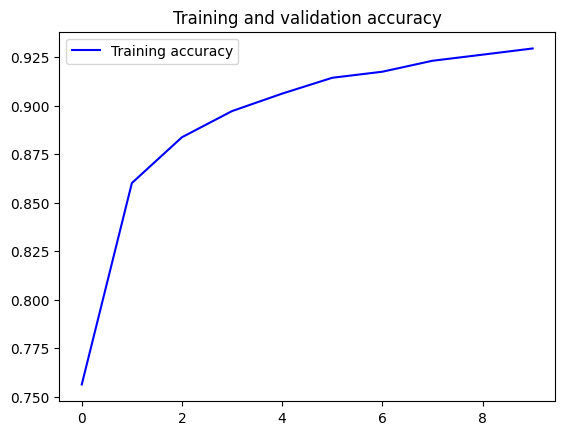

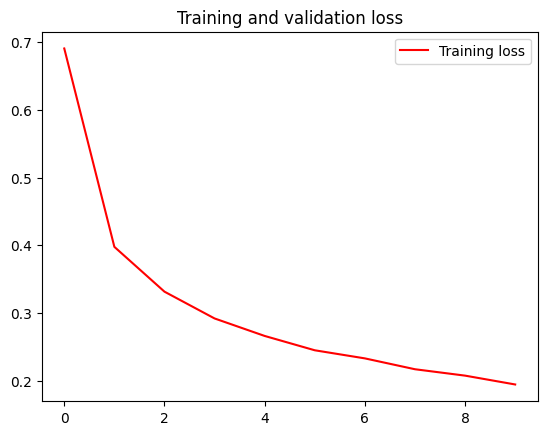

In [28]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy')  # change this line
loss = history.history['loss']
val_loss = history.history.get('val_loss')  # change this line

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
# if val_accuracy is not None:
#     plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
# if val_loss is not None:
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


# plt.show()


## Testing

In [29]:
predicted_classes = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9223
The accuracy is:  0.9222999811172485


Epoch 1/10
1372/1372 [==============================] - 12s 8ms/step - loss: 0.2526 - accuracy: 0.9102 - val_loss: 0.2303 - val_accuracy: 0.9129
Epoch 2/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.2183 - accuracy: 0.9225 - val_loss: 0.2111 - val_accuracy: 0.9225
Epoch 3/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.2023 - accuracy: 0.9263 - val_loss: 0.2014 - val_accuracy: 0.9270
Epoch 4/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1906 - accuracy: 0.9312 - val_loss: 0.2091 - val_accuracy: 0.9258
Epoch 5/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1854 - accuracy: 0.9340 - val_loss: 0.2094 - val_accuracy: 0.9268
Epoch 6/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1775 - accuracy: 0.9362 - val_loss: 0.2033 - val_accuracy: 0.9292
Epoch 7/10
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1721 - accuracy: 0.9380 - val_loss: 0.2172 - val_ac

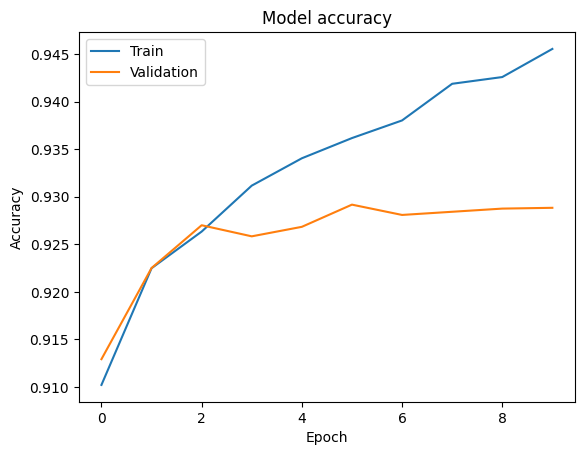

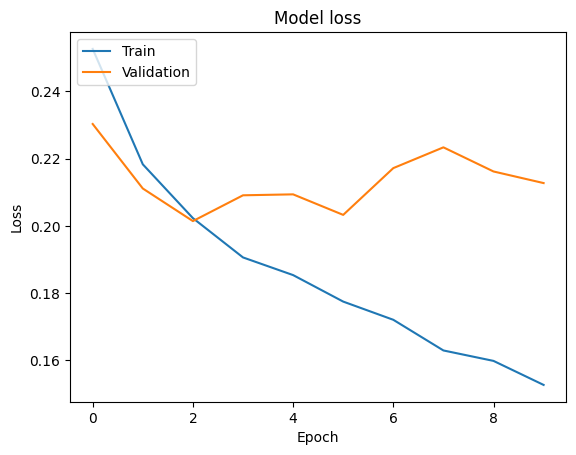

313/313 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9221
The accuracy is:  0.9221000075340271


In [31]:
%matplotlib inline
history = model.fit(X_train, y_train, batch_size=35, epochs=10, verbose=1, validation_split=0.2)

# Plot training & validation accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy')  # change this line
loss = history.history['loss']
val_loss = history.history.get('val_loss')  # change this line

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# plt.show()
predicted_classes = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])